In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# CONSTANT PARAMETERS
SIZE_X, SIZE_Y = 800, 400  # size of the screen
MAX_ITERATIONS = 32  # maximum number of iterations (also affects the resolution of the fractal)


def calculate_escape_iteration(z: complex, c: complex, func, max_iter=MAX_ITERATIONS):
    iteration = 0
    while abs(z) < 2 and iteration < max_iter:
        z = func(z, c)
        iteration += 1
    return iteration


def contour_plot_matrix(matrix: np.ndarray, title: str):
    plt.figure()
    plt.title(title)
    plt.contourf(matrix, [iteration for iteration in range(0, MAX_ITERATIONS, MAX_ITERATIONS // 32)])
    plt.axis('off')
    plt.show()

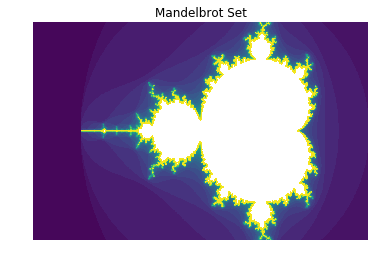

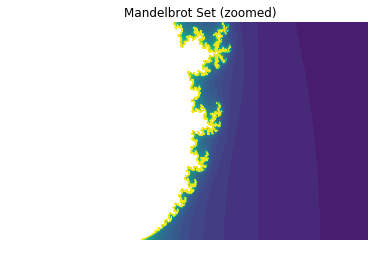

In [2]:
mandelbrot = np.zeros((SIZE_Y, SIZE_X))  # matrix storing the graph of the fractal
mandelbrot_zoomed = np.zeros((SIZE_Y, SIZE_X))

for pixel_x in range(0, SIZE_X):
    for pixel_y in range(0, SIZE_Y):
        # The mandlebrot fractal has X scale of [-2.5, 1] and Y scale of [-1, 1]
        # the pixel coordinates have to be scaled to fit in the range
        mandelbrot[pixel_y, pixel_x] = calculate_escape_iteration(
            complex(0, 0),
            complex(
                -2.5 + pixel_x / SIZE_X * (1 - (-2.5)),
                -1 + pixel_y / SIZE_Y * (1 - (-1))
            ),
            lambda z, c: z ** 2 + c
        )
        mandelbrot_zoomed[pixel_y, pixel_x] = calculate_escape_iteration(
            complex(0, 0),
            complex(
                pixel_x / 1000, 
                pixel_y / 1000
            ),
            lambda z, c: z ** 2 + c
        )
        
contour_plot_matrix(mandelbrot, "Mandelbrot Set")
contour_plot_matrix(mandelbrot_zoomed, "Mandelbrot Set (zoomed)")


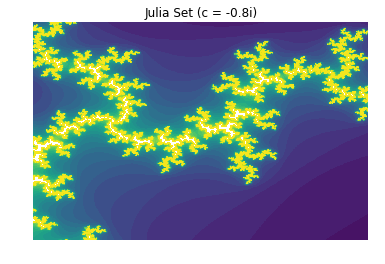

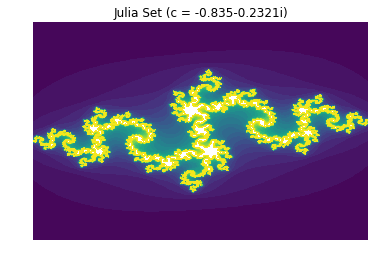

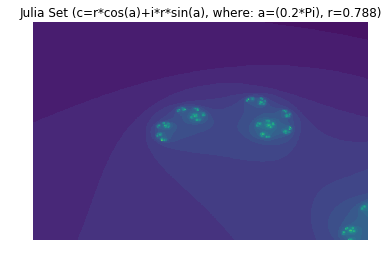

In [3]:
import cmath

julia = np.zeros((SIZE_Y, SIZE_X))
julia2 = np.zeros((SIZE_Y, SIZE_X))
julia3 = np.zeros((SIZE_Y, SIZE_X))

for x in range(SIZE_X):
    for y in range(SIZE_Y):
        julia[y, x] = calculate_escape_iteration(
            complex(x / SIZE_X, y / SIZE_Y),
            -0.8j,
            lambda z, c: z ** 2 + c
        )
        julia2[y, x] = calculate_escape_iteration(
            complex(x / SIZE_X * 3 - 1.5, y / SIZE_Y * 3 - 1.5),
            -0.835-0.2321j,
            lambda z, c: z ** 2 + c
        )
        julia3[y, x] = calculate_escape_iteration(
            complex(x / SIZE_X / 4, y / SIZE_Y / 4 + 1.1),
            0.7885 * (cmath.cos(0.2 * cmath.pi) + 1j * cmath.sin(0.2 * cmath.pi)),  # phase = 0.2π
            lambda z, c: z ** 2 + c
        )

contour_plot_matrix(julia, "Julia Set (c = -0.8i)")
contour_plot_matrix(julia2, "Julia Set (c = -0.835-0.2321i)")
contour_plot_matrix(julia3, "Julia Set (c=r*cos(a)+i*r*sin(a), where: a=(0.2*Pi), r=0.788)")